### Importing necessary libraries

In [49]:
%pip install scikit-image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical
from skimage.io import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

Note: you may need to restart the kernel to use updated packages.


In [17]:
print(tf. __version__)

2.19.0


### Defining the path of dataset directory

In [18]:
dataset_path = "C:\Plant-Disease-Detection\Dataset"

### Visualizing the images and Resize images

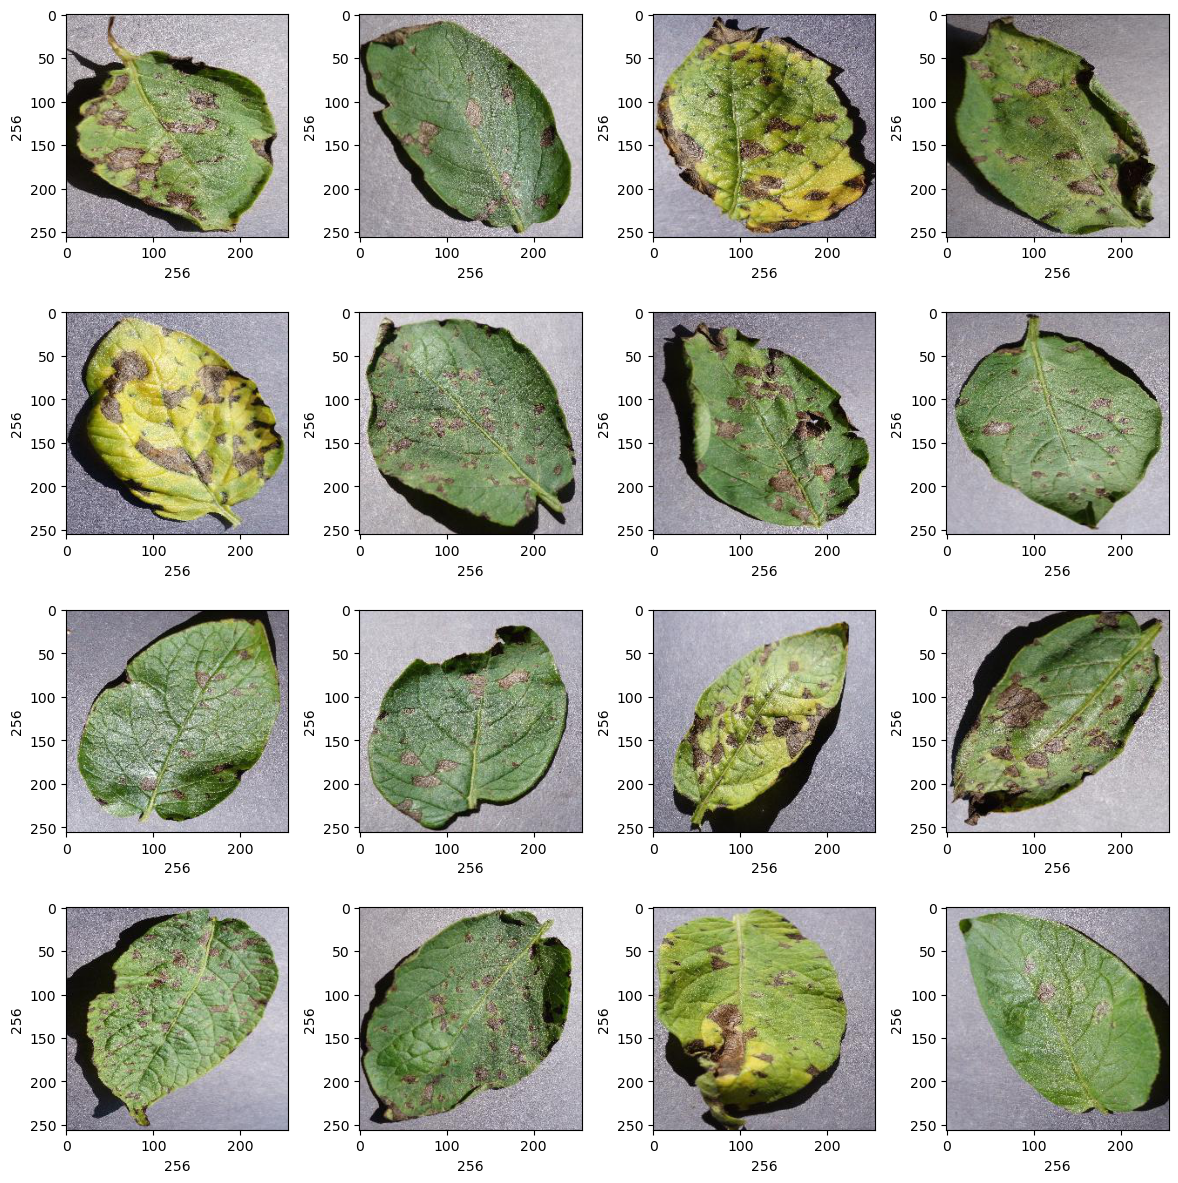

In [22]:
# Using raw string (r prefix) to avoid escape character issues
dataset_path = r"C:\Users\mbuto\Agri-sol\Dataset\Potato___Early_blight"

# Check if directory exists
if not os.path.exists(dataset_path):
    print(f"Error: Directory '{dataset_path}' does not exist!")
else:
    plt.figure(figsize=(12, 12))
    
    files = sorted(os.listdir(dataset_path))
    
    if len(files) == 0:
        print(f"Warning: No files found in '{dataset_path}'")
    else:
        for i in range(1, min(17, len(files) + 1)):
            plt.subplot(4, 4, i)
            plt.tight_layout()
            rand_img = imread(os.path.join(dataset_path, random.choice(files)))
            plt.imshow(rand_img)
            plt.xlabel(rand_img.shape[1], fontsize=10)
            plt.ylabel(rand_img.shape[0], fontsize=10)

### Convert the images into a Numpy array and normalize them

In [38]:
# Converting Images to array 

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [39]:
dataset_path = r"C:\Users\mbuto\Agri-sol\Dataset"

if os.path.exists(dataset_path):
	labels = os.listdir(dataset_path)
	print(labels)
else:
	print(f"Error: Directory '{dataset_path}' does not exist!")

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'New Plant Diseases Dataset(Augmented)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato

In [41]:
dataset_path = r"C:\Users\mbuto\Agri-sol\Dataset"
root_dir = listdir(dataset_path)
image_list, label_list = [], []

# Updated to match actual directory names
all_labels = ['Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Tomato___Bacterial_spot']
binary_labels = [0, 1, 2]

# Filter directories to only include expected ones
expected_dirs = [d for d in root_dir if d in all_labels]
temp = -1

# Reading and converting image to numpy array
for directory in expected_dirs:
    plant_image_list = listdir(f"{dataset_path}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dataset_path}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

print(f"Images loaded: {len(image_list)}")
print(f"Labels created: {len(label_list)}")

Images loaded: 5548
Labels created: 5548


### Visualize the class count and Check for class imbalance

In [42]:
print("Length of label_list:", len(label_list))
print("Length of image_list:", len(image_list))
print("First few items in label_list:", label_list[:5])

Length of label_list: 5548
Length of image_list: 5548
First few items in label_list: [0, 0, 0, 0, 0]


In [43]:
# Visualize the number of classes count
from collections import Counter

label_counts = Counter(label_list)
print(label_counts)

Counter({1: 1939, 0: 1907, 2: 1702})


### it is a balanced dataset as we can see

In [44]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [45]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(5548,)

### Splitting the dataset into train, validate and test sets

In [46]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [47]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

### Performing one-hot encoding on target variable

In [48]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Creating the model architecture, compile the model and then fit it using the training data

In [50]:
model = Sequential()

# First Conv Block
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Block  
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv Block
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Conv Block
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))

model.summary()

c:\Users\mbuto\.conda\envs\heart\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,077,379 (129.99 MB)

 Trainable params: 34,076,419 (129.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [28]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [29]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 1.0359 - accuracy: 0.3646 - val_loss: 0.9110 - val_accuracy: 0.4792
Epoch 2/50
5/5 [==============================] - 10s 2s/step - loss: 0.8759 - accuracy: 0.5347 - val_loss: 0.7730 - val_accuracy: 0.6806
Epoch 3/50
5/5 [==============================] - 10s 2s/step - loss: 0.7323 - accuracy: 0.7396 - val_loss: 0.6498 - val_accuracy: 0.8889
Epoch 4/50
5/5 [==============================] - 10s 2s/step - loss: 0.6089 - accuracy: 0.9115 - val_loss: 0.5380 - val_accuracy: 0.9306
Epoch 5/50
5/5 [==============================] - 10s 2s/step - loss: 0.5015 - accuracy: 0.9236 - val_loss: 0.4367 - val_accuracy: 0.9167
Epoch 6/50
5/5 [==============================] - 10s 2s/step - loss: 0.4150 - accuracy: 0.9201 - val_loss: 0.3663 - val_accuracy: 0.9583
Epoch 7/50
5/5 [==============================] - 10s 2s/step - loss: 0.3455 - accuracy: 0.9323 - val_loss: 0.3048 - val_accuracy: 0.9583
Epoch 8/50
5/5 [==================

In [36]:
model.save("C:\Plant-Disease-Detection\Model\plant_disease_model.h5")

### Plot the accuracy and loss against each epoch

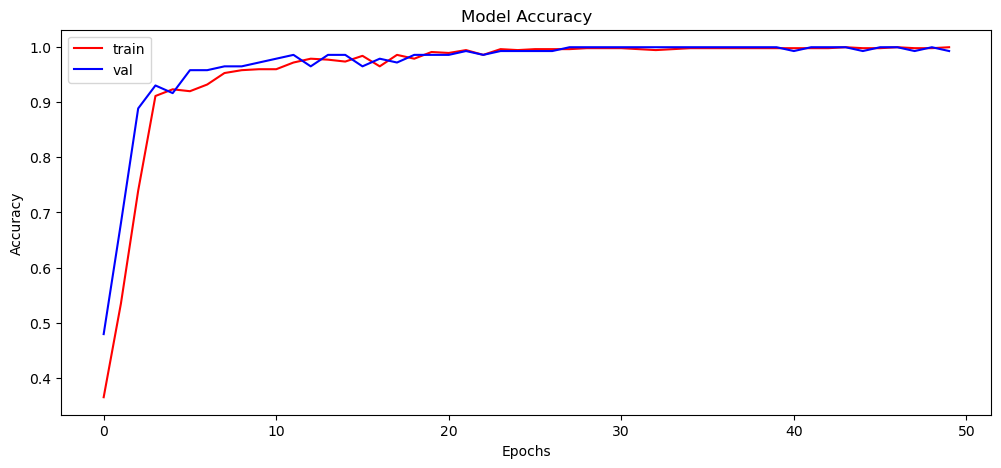

In [40]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [41]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
6/6 [==============================] - 1s 116ms/step - loss: 0.0246 - accuracy: 0.9944
Test Accuracy: 99.44444298744202


### Make predictions on testing data

In [53]:
y_pred = model.predict(x_test)

6/6 [==============================] - 1s 106ms/step


### Visualizing the original and predicted labels for the test images

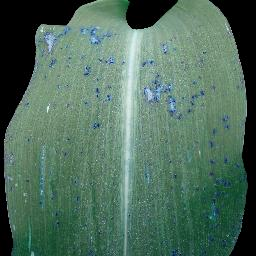

In [57]:
# Plotting image to compare

img = array_to_img(x_test[11])
img

In [62]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust
[7.9205156e-06 2.2908032e-02 9.7708410e-01]


In [67]:
for i in range(50):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

Potato-Early_blight   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_r